# Kaggle Titanic Dataset - EDA and Predictive Modeling

#### We start with required imports

In [1]:
# Import dependencies
%matplotlib  inline

# Start python imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## DATA GATHERING

### Load Datasets with Pandas
### We create two datasets - Train, Test (training and test data sets respectively)
### We also load the gender_submission file which basically tells us how the final prediction should look like

In [2]:
# Import Train and Test Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

#### Have a look at the first 5 rows of the Training Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Have a look at the first 5 rows of the Test Data

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Have a look at the first 5 rows from the gender_submission data

In [5]:
gender_submission.head() # This is what we are trying to predict

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Get some more information about the Training Data

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## DATA CLEANING

### Let's use the misingno library to better visualize the missing or null values in our training dataset

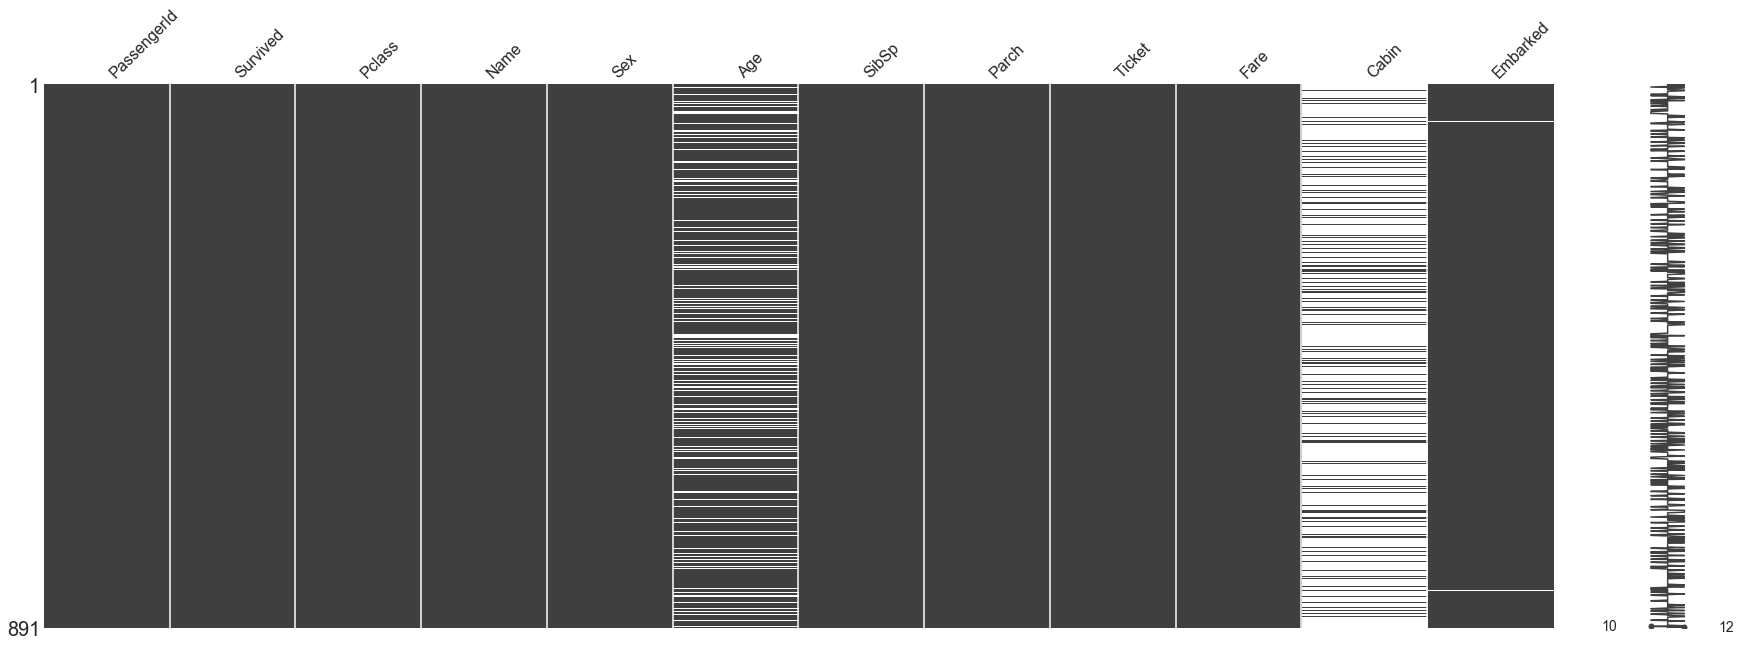

In [7]:
# Plot a graph of missing values
missingno.matrix(train, figsize = (30,10))

### The white lines in the graph above represent missing or null values and so it can be seen that Age has a significant number of nulls, Cabin has the maximum and Embarked has two

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Let's calculate the number of missing values for each column

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### So there are 177 null values in the Age column and 687 null values in the Cabin column
### We will have to address the Age column later as it is an important factor in predicting a passenger's survival

### The Cabin column has the maximum number of null values in this data set and so we need to ask ourselves if Cabin is going to affect our prediction model in any way?
### Well, the answer is No. A passenger's survival is not dependent on the cabin occupied by him or her. So, we can remove the Cabin column entirely from the Dataset

In [10]:
# Drop the Cabin column from the dataset
train.drop("Cabin", axis = 1, inplace = True)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Our dataset does not have the Cabin column anymore

### Let's come back to the Age Column. As mentioned before, Age is an important factor to predict a passenger's chances of survival
### What do we do about the null values in this column?
### A good idea would be to fill the empty cells in this column with the 'mean' (average) of all ages

In [12]:
# Fill values in the Age Column
train['Age'].fillna((train['Age'].mean()), inplace = True)

### Let's check null values in the dataset again

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### The Age column now has 0 null values. Good
### We still have two null values in the Embarked column. It is always a good idea to have a clean dataset - without any nulls. This improves the accuracy of our model
### Since we have good data in our Age column, we can go ahead and delete all other rows that have null values in the dataset (it will delete two rows from the Embarked column in this case)

In [14]:
# Delete all null values from the dataset
train.dropna(inplace = True)

### Let's check null info now

In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Great. We have 0 null values in our dataset
### Let's visualize this again using missingno

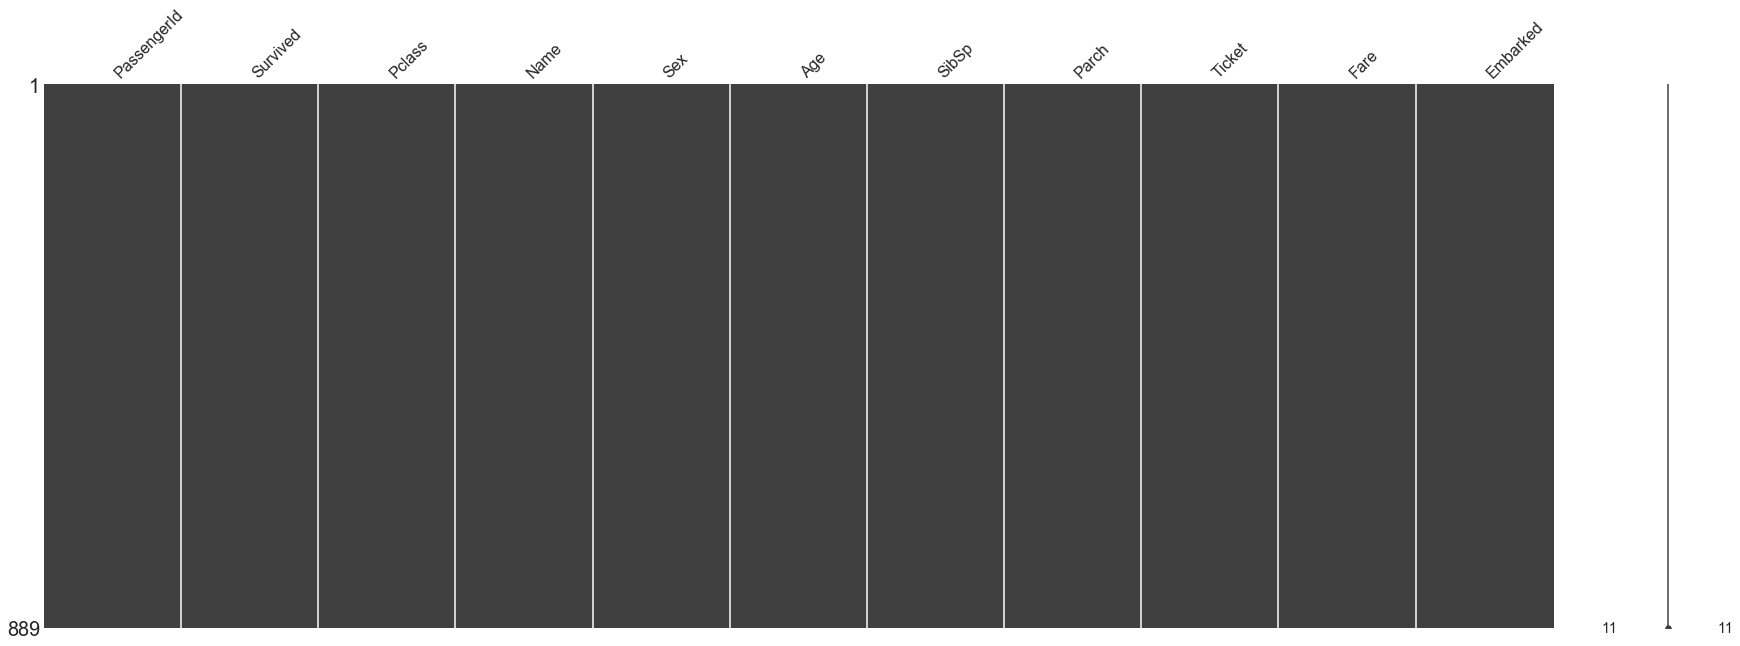

In [16]:
missingno.matrix(train, figsize = (30, 10))

In [17]:
train.shape

(889, 11)

### So far so good. We have 889 rows and 11 columns in our datset now, with values in all cells

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### A machine learning model works great with numeric data
### If we take a look at the Sex column, the given values are of string type (male, female). Let's first convert these values into numerics

In [19]:
# Create Dummies (Categories) for the sex column
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


### So now we have '1' and '0' telling us the gender of a passenger
### '1' represents Male and '0' represents Female

### We have string values in the PClass, Embarked columns as well
### Let's convert these to numerics

In [20]:
# Create Dummies for Pclass
pcl = pd.get_dummies(train['Pclass'])
pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


### We now have numeric values indicating which class a passenger belonged to
### In the above table, row 0 has '1' under '3' meaning this passenger travelled in Pclass 3
### Row 1 has '1' under '1' meaning this passenger travelled in Pclass 1 and so on..
### Let's do something similar for the Embarked column

In [21]:
# Create dummies for Embarked
embark = pd.get_dummies(train['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


### Similar to what we did for the Pclass column, we now have numeric values representing the three places from which passengers embarked
### In Row 0 we have a '1' under 'S' meaning this passenger embarked from Southampton

### We now go ahead and merge all these with the original training data set

In [22]:
train = pd.concat([train, sex, pcl, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1


### We have added 7 new columns to this dataset (1 for Sex, 3 for Pclass and 3 for Embarked)
### Sex is now represented by the 'male' column. So 1 in this column means the passenger is a Male and Female if value is 0
### 1, 2 & 3 represent Pclass 1, 2 and 3 respectively. A passenger will have a '1' for the Pclass he or she belonged to
### C,Q & S represent the Embarked 'C', Q' and 'S' respectively. A passenger will have a '1' for the place from which he or she embarked

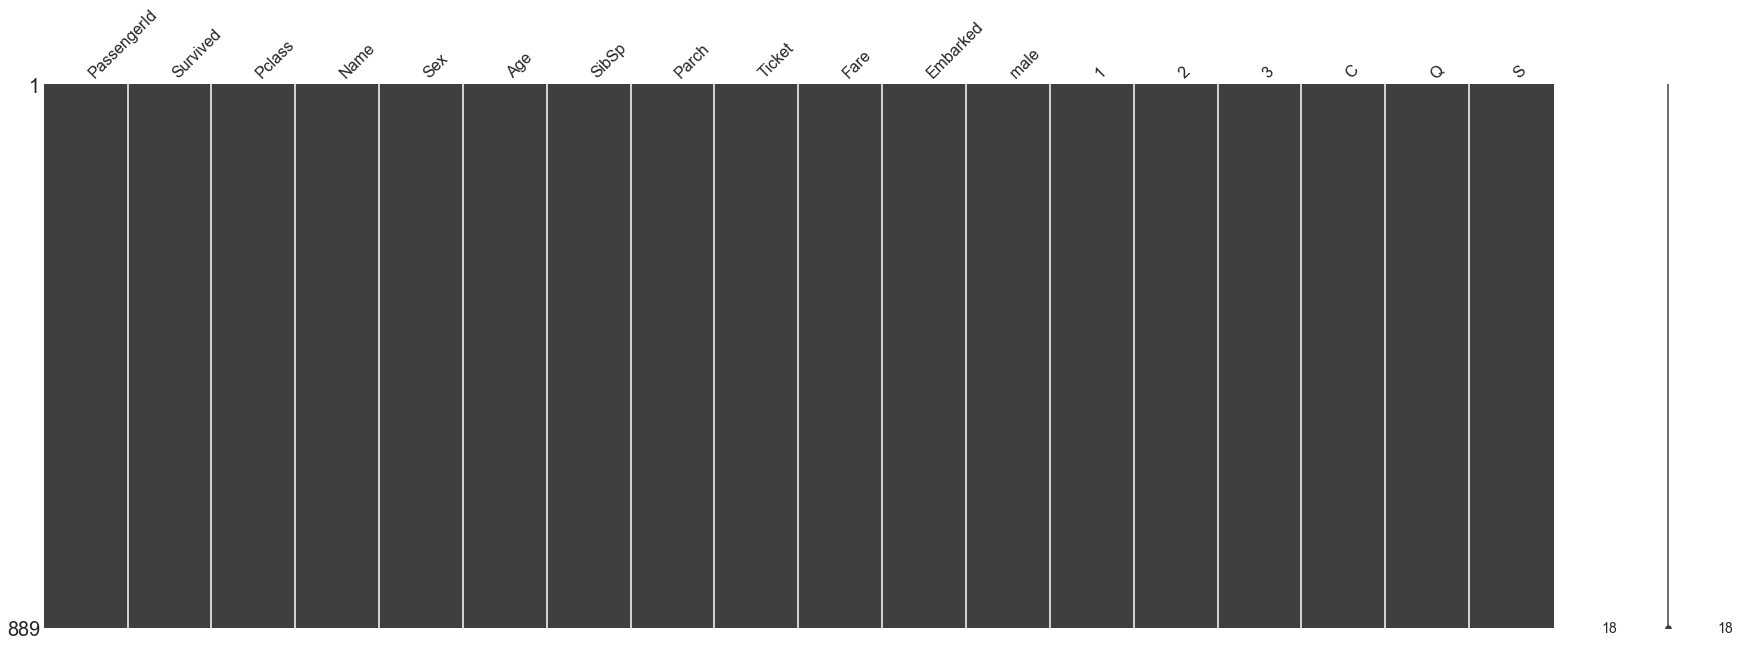

In [23]:
missingno.matrix(train, figsize = (30, 10))

### We now go ahead and drop all columns that we no longer require - Pclass, Sex, Embarked, Name, Ticket, PassengerId
### We already have numeric values for Pclass, Sex, Embarked while Name, Ticket and PassengerId have no impact whatsoever on our model

In [24]:
# Drop all columns that are not required
train.drop(['Sex', 'Embarked', 'Pclass', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,1,2,3,C,Q,S
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


### We now have Clean Data

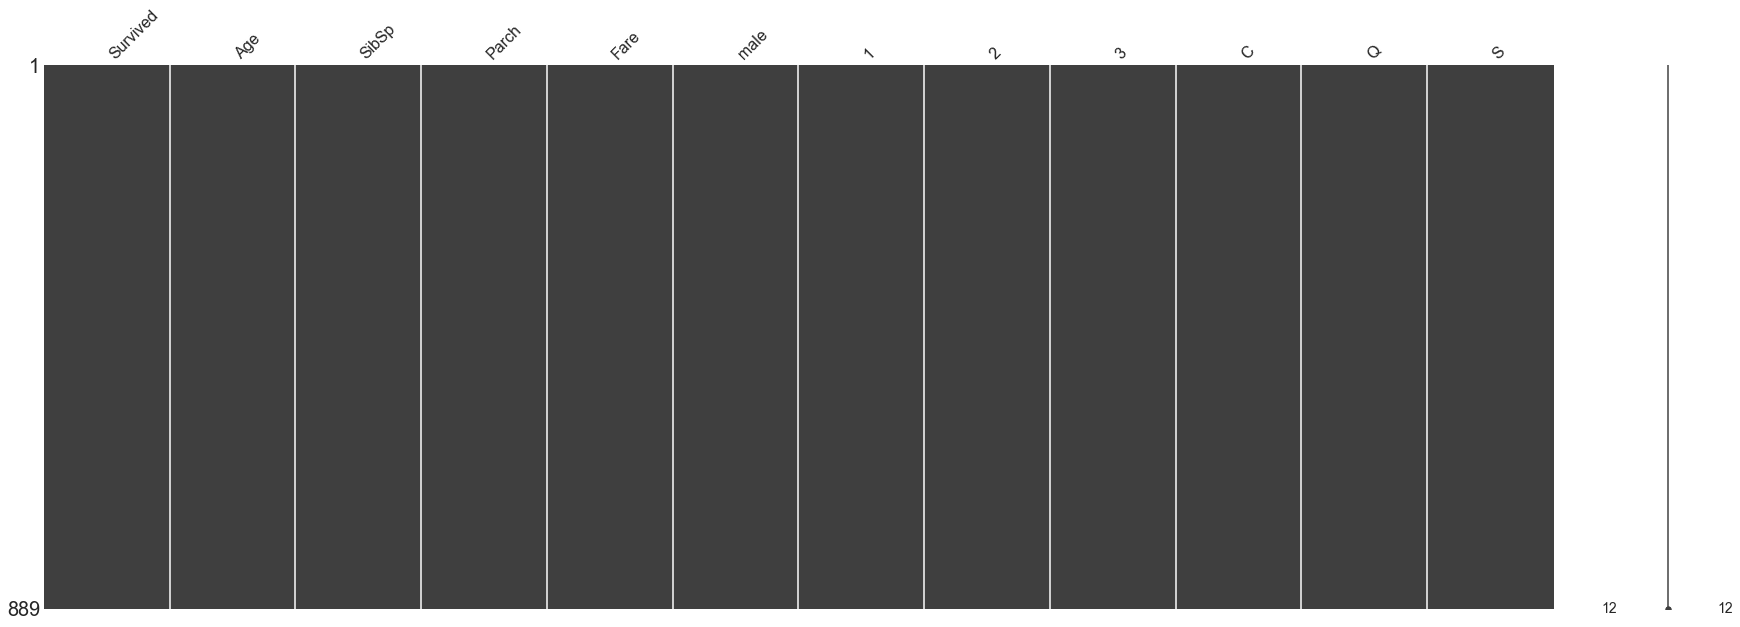

In [25]:
missingno.matrix(train, figsize = (30, 10))

## BUILD THE MODEL

### First we will split our training dataset

In [26]:
# Drop the Survived column and store rest of the columns in X. This represents independent variables
X = train.drop("Survived", axis = 1)

# Store Survivied as a dependent variable in Y
Y = train['Survived']

In [27]:
X.head()

,Age,SibSp,Parch,Fare,male,1,2,3,C,Q,S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [28]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
# Import required libraries for splitting data
from sklearn.model_selection import train_test_split

### Let's split our dataset into training and test sets

In [30]:
# Split the data (30% is set as Test Data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [31]:
X_train

,Age,SibSp,Parch,Fare,male,1,2,3,C,Q,S
115,21.000000,0,0,7.9250,1,0,0,1,0,0,1
874,28.000000,1,0,24.0000,0,0,1,0,1,0,0
77,29.699118,0,0,8.0500,1,0,0,1,0,0,1
876,20.000000,0,0,9.8458,1,0,0,1,0,0,1
682,20.000000,0,0,9.2250,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
716,38.000000,0,0,227.5250,0,1,0,0,1,0,0
768,29.699118,1,0,24.1500,1,0,0,1,0,1,0
73,26.000000,1,0,14.4542,1,0,0,1,1,0,0
236,44.000000,1,0,26.0000,1,0,1,0,0,0,1


In [32]:
X_test

,Age,SibSp,Parch,Fare,male,1,2,3,C,Q,S
387,36.000000,0,0,13.0000,0,0,1,0,0,0,1
259,50.000000,0,1,26.0000,0,0,1,0,0,0,1
771,48.000000,0,0,7.8542,1,0,0,1,0,0,1
208,16.000000,0,0,7.7500,0,0,0,1,0,1,0
683,14.000000,5,2,46.9000,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
248,37.000000,1,1,52.5542,1,1,0,0,0,0,1
601,29.699118,0,0,7.8958,1,0,0,1,0,0,1
240,29.699118,1,0,14.4542,0,0,0,1,1,0,0
468,29.699118,0,0,7.7250,1,0,0,1,0,1,0


In [33]:
Y_train

115    0
874    1
77     0
876    0
682    0
      ..
716    1
768    0
73     0
236    0
37     0
Name: Survived, Length: 622, dtype: int64

In [34]:
Y_test

387    1
259    1
771    0
208    1
683    0
      ..
248    1
601    0
240    0
468    0
93     0
Name: Survived, Length: 267, dtype: int64

### Import a Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
# Create the Model and fit data
logmodel = LogisticRegression(max_iter = 900)
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Now, Let's Predict !

In [41]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [38]:
# Metrics
from sklearn.metrics import accuracy_score
# Calculate accuracy of our model
print(accuracy_score(Y_test, predictions) * 100)

83.52059925093633


### Our model has an accuracy of around 83%
### Let's test the model. We will take sample data for a passenger who did not survive (taken from the original data set, first row), and our model should return 0 (not survived)

In [39]:
predictions = logmodel.predict([[22.0, 1, 0, 7.2500, 1, 0, 0, 1, 0, 0, 1]])
predictions

array([0], dtype=int64)

### And our model predicted correctly !

In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test.shape

(418, 11)

In [45]:
test_embark = pd.get_dummies(test['Embarked'])
test_embark

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [47]:
test_sex = pd.get_dummies(test['Sex'], drop_first = True)
test_sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [48]:
test_pclass = pd.get_dummies(test['Pclass'])
test_pclass

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [49]:
test = pd.concat([test, test_sex, test_pclass, test_embark], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,1,2,3,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1,0,0,1


In [50]:
# We can find the columns we made predictions on with X_train.columns
test_columns = X_train.columns
test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 1, 2, 3, 'C', 'Q', 'S'], dtype='object')

In [58]:
test['Age'].fillna((test['Age'].mean()), inplace = True)

In [67]:
test[test_columns]

,Age,SibSp,Parch,Fare,male,1,2,3,C,Q,S
0,34.50000,0,0,7.8292,1,0,0,1,0,1,0
1,47.00000,1,0,7.0000,0,0,0,1,0,0,1
2,62.00000,0,0,9.6875,1,0,1,0,0,1,0
3,27.00000,0,0,8.6625,1,0,0,1,0,0,1
4,22.00000,1,1,12.2875,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,1,0,0,1,0,0,1
414,39.00000,0,0,108.9000,0,1,0,0,1,0,0
415,38.50000,0,0,7.2500,1,0,0,1,0,0,1
416,30.27259,0,0,8.0500,1,0,0,1,0,0,1


In [68]:
test[test_columns].isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     1
male     0
1        0
2        0
3        0
C        0
Q        0
S        0
dtype: int64

In [69]:
test['Fare'].fillna((test['Fare'].mean()), inplace = True)

In [70]:
test[test_columns].isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
male     0
1        0
2        0
3        0
C        0
Q        0
S        0
dtype: int64

In [71]:
predictions = logmodel.predict(test[test_columns])

In [73]:
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [75]:
# Create a submission dataframe and append relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [76]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [77]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../logistic_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [78]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../logistic_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
